In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sc
from sklearn import preprocessing
from sklearn import model_selection
import pickle

RANDOM_STATE = 2342

import utility

%matplotlib inline

In [2]:
train = pd.read_csv('data/train_final.csv', delimiter='\t')
train, test = model_selection.train_test_split(train, test_size=0.20, random_state=RANDOM_STATE)

playlists = pd.read_csv('data/playlists_final.csv', delimiter='\t')
target_playlists = pd.read_csv('data/target_playlists.csv', delimiter='\t')
target_tracks = pd.read_csv('data/target_tracks.csv', delimiter = '\t')
tracks = pd.read_csv('data/tracks_final.csv', delimiter='\t')

In [98]:
albums = pickle.load(open("data/albums.dat", "rb"))
artists = pickle.load(open("data/artists.dat", "rb"))
owners = pickle.load(open("data/owners.dat", "rb"))
playlist_content = pickle.load(open("data/playlist_content.dat", "rb"))

In [3]:
train.head()

,playlist_id,track_id
311724,1611401,4587
905178,4745427,1064050
961334,10804857,2802723
120554,5517911,2739334
328489,11317703,2630594


In [4]:
playlists.head()

,created_at,playlist_id,title,numtracks,duration,owner
0,1216545588,644838,[12727],27,6522,41504
1,1249326867,7577564,[],9,2650,41504
2,1257766688,3120683,[183],16,3645,44542
3,1248079275,4278112,"[12389, 18698, 18925, 11695, 7117]",15,4151,44542
4,1175201268,8656823,"[12809, 2095, 13257, 12671, 20426, 14448, 18698]",84,18414,44542


In [5]:
playlists.numtracks.describe()

count    57561.000000
mean        30.738816
std         42.731612
min          0.000000
25%          5.000000
50%         13.000000
75%         36.000000
max        200.000000
Name: numtracks, dtype: float64

In [6]:
playlists.duration.describe()

count     57561.000000
mean       8079.101075
std       11852.823672
min           0.000000
25%        1260.000000
50%        3359.000000
75%        9224.000000
max      439332.000000
Name: duration, dtype: float64

In [7]:
playlists.groupby('owner').count()['created_at'].describe()

count    15264.000000
mean         3.771030
std         11.327855
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1158.000000
Name: created_at, dtype: float64

In [8]:
tracks.head()

,track_id,artist_id,duration,playcount,album,tags
0,2972914,144,224000,49.0,[7],"[54087, 1757, 1718, 116712, 189631]"
1,2750239,246,157000,1.0,[8],"[189631, 3424, 177424, 46208, 205245]"
2,1550729,144,217000,554.0,[9],"[54087, 109806, 46869, 183258, 54337]"
3,2169950,144,207000,200.0,[9],"[54087, 70618, 207003, 109806, 116712]"
4,1903709,144,198000,5.0,[None],"[54087, 81223, 116712, 215342, 71028]"


In [9]:
len(tracks.album.unique())

27606

In [10]:
tracks['duration'].describe()

count    1.000000e+05
mean     2.620218e+05
std      9.864639e+05
min     -1.000000e+00
25%      1.970000e+05
50%      2.400000e+05
75%      2.970000e+05
max      2.195850e+08
Name: duration, dtype: float64

In [11]:
tracks['playcount'].describe()

count    9.910600e+04
mean     2.494978e+03
std      1.083555e+04
min      0.000000e+00
25%      7.300000e+01
50%      4.910000e+02
75%      2.067000e+03
max      1.918184e+06
Name: playcount, dtype: float64

In [12]:
tracks.groupby('artist_id').count()['track_id'].describe()

count    17536.000000
mean         5.702555
std         10.732867
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        221.000000
Name: track_id, dtype: float64

In [13]:
tracks['playcount'].describe()

count    9.910600e+04
mean     2.494978e+03
std      1.083555e+04
min      0.000000e+00
25%      7.300000e+01
50%      4.910000e+02
75%      2.067000e+03
max      1.918184e+06
Name: playcount, dtype: float64

In [14]:
target_playlists.head()

,playlist_id
0,10024884
1,10624787
2,4891851
3,4267369
4,65078


In [15]:
target_tracks.head()

,track_id
0,1316175
1,3885714
2,3091270
3,226759
4,230596


In [16]:
playlists['numtrack_token'] = pd.qcut(playlists['numtracks'], 6)

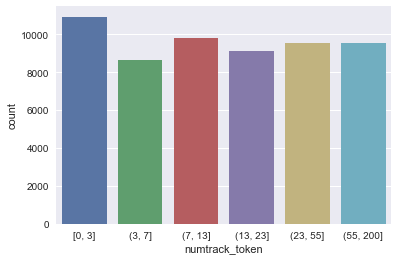

In [17]:
sns.countplot(x = 'numtrack_token', data=playlists)

## Model training and algorithm evaluation

In [18]:
test.head()

,playlist_id,track_id
1008820,6911566,3557507
980327,11061424,2180906
1024318,4933403,3091541
860126,10804506,2974385
138165,11288476,611551


In [19]:
test.head()

,playlist_id,track_id
1008820,6911566,3557507
980327,11061424,2180906
1024318,4933403,3091541
860126,10804506,2974385
138165,11288476,611551


In [90]:
a = train.groupby('track_id').count()
382
353
352
326
311
a[a['playlist_id'] == 311]

,playlist_id
track_id,
3779477,311


In [84]:
a[a['playlist_id'] == 382].keys()

Index(['playlist_id'], dtype='object')

In [91]:
temp = test.copy()
print(len(temp))
recommendations = temp.drop_duplicates('playlist_id').drop('track_id', axis=1)
print(len(recommendations))
recommendations['recommendations'] = 0
recommendations['recommendations'] = recommendations['recommendations'].apply(lambda e: [1563309,3705881,1363985,1595978,3779477])

208105
35285


In [92]:
recommendations

,playlist_id,recommendations
1008820,6911566,"[1563309, 3705881, 1363985, 1595978, 3779477]"
980327,11061424,"[1563309, 3705881, 1363985, 1595978, 3779477]"
1024318,4933403,"[1563309, 3705881, 1363985, 1595978, 3779477]"
860126,10804506,"[1563309, 3705881, 1363985, 1595978, 3779477]"
138165,11288476,"[1563309, 3705881, 1363985, 1595978, 3779477]"
295173,5973090,"[1563309, 3705881, 1363985, 1595978, 3779477]"
843449,5978436,"[1563309, 3705881, 1363985, 1595978, 3779477]"
169844,8290343,"[1563309, 3705881, 1363985, 1595978, 3779477]"
928863,8375145,"[1563309, 3705881, 1363985, 1595978, 3779477]"
165008,11644519,"[1563309, 3705881, 1363985, 1595978, 3779477]"


In [93]:
for it, row in recommendations.head().iterrows():
    print(row['playlist_id'])
    print(row['recommendations'])

6911566
[1563309, 3705881, 1363985, 1595978, 3779477]
11061424
[1563309, 3705881, 1363985, 1595978, 3779477]
4933403
[1563309, 3705881, 1363985, 1595978, 3779477]
10804506
[1563309, 3705881, 1363985, 1595978, 3779477]
11288476
[1563309, 3705881, 1363985, 1595978, 3779477]


In [94]:
utility.evaluate(test, recommendations)

0.0011078361910160127